<a href="https://colab.research.google.com/github/caxaxa/SigmaGeek_Cellular_Automata/blob/main/Sigma_Geek_Cellular_Atutomata_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Celular Automata Maze

In [225]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [226]:
#get the second grid from the game
import urllib.request


url = "https://s3.amazonaws.com/appforest_uf/f1678907491882x777874554533324300/input.txt"
response = urllib.request.urlopen(url)
grid0 = np.loadtxt(response, delimiter=" ")



In [227]:
# Define a function to plot a grid


def plot_grid(grid):
    n_rows, n_cols = grid.shape
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.imshow(grid, cmap="Greens", extent=[0, n_cols, 0, n_rows], origin="lower") # set cmap to "Greens"
    ax.set_xticks(range(n_cols+1))
    ax.set_yticks(range(n_rows+1))
    ax.grid(color="gray", linewidth=0.5)
    plt.show()

    return fig,ax
    


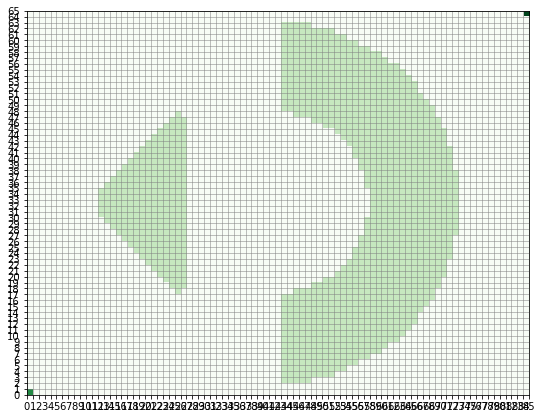

(<Figure size 648x648 with 1 Axes>, <Axes: >)

In [228]:
plot_grid(grid0)

In [229]:
def apply_rule(center, neighbors):
    # Count the number of green neighbors
    green_neighbors = np.count_nonzero(neighbors)
    # Apply the appropriate rule based on the center cell's color and the number of green neighbors
    if center == 0:
        # White cell rule
        if green_neighbors > 1 and green_neighbors < 5:
            return 1  # Turn white cell green
        else:
            return 0  # Keep white cell white
    else:
        # Green cell rule
        if green_neighbors > 3 and green_neighbors < 6:
            return 1  # Keep green cell green
        else:
            return 0  # Turn green cell white
    

def next_generation(grid):
    # Define function to apply the rules to each cell
    # Get the dimensions of the input grid
    n_rows, n_cols = grid.shape
    # Create a new grid of the same dimensions to store the next generation
    new_grid = np.zeros_like(grid)
    # Loop through each cell in the input grid
    for i in range(n_rows):
        for j in range(n_cols):
            # Get the 8 neighbors of the current cell
            neighbors = np.zeros(9, dtype=np.int8)
            for k in range(3):
                for l in range(3):
                    if k == 1 and l == 1:
                        continue  # Skip the center cell
                    row = i + k - 1
                    col = j + l - 1
                    if row < 0 or row >= n_rows or col < 0 or col >= n_cols:
                        # If a neighbor is out of bounds, treat it as a white cell
                        neighbors[k * 3 + l] = 0
                    else:
                        neighbors[k * 3 + l] = grid[row, col]
            # Apply the rules to the current cell and store the result in the new grid
            new_grid[i, j] = apply_rule(grid[i, j], neighbors)
    # Return the new grid representing the next generation
    return new_grid

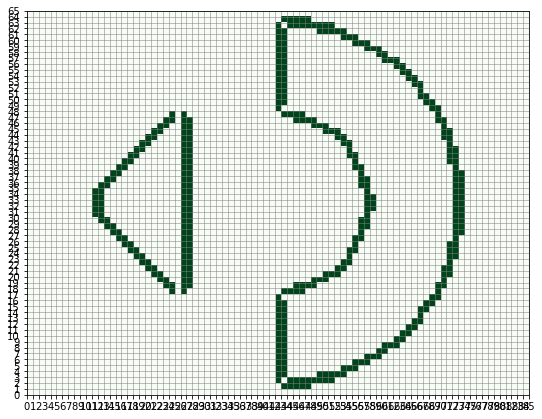

(<Figure size 648x648 with 1 Axes>, <Axes: >)

In [230]:
grid1 = next_generation(grid0)
plot_grid(grid1)

In [231]:
from matplotlib import cm

def plot_grid(grid, ax):
    # Create a color map: 0 as white and 1 as green
    cmap = cm.get_cmap('viridis', 2)
    cmap.set_under('white')
    img = ax.imshow(grid, cmap=cmap, vmin=0.5, vmax=1.5, interpolation='nearest')
    return [img]

def create_animation(grid0, n, update, plot_grid):
    frames = [grid0]

    for i in range(n-1):
        new_frame = update(frames[-1])
        frames.append(new_frame)

    def update_plot(frame_number, frames, ax):
        ax.clear()
        artists = plot_grid(frames[frame_number], ax)
        return artists

    fig, ax = plt.subplots()
    ani = animation.FuncAnimation(fig, update_plot, n, fargs=(frames, ax), interval=200, blit=True)

    plt.show()

    return ani

<ipython-input-231-03382b1b8af5>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 2)


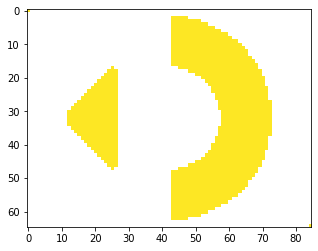

In [232]:
my_animation = create_animation(grid0, 200, next_generation, plot_grid)

In [233]:
my_animation.save('anime.avi')

<ipython-input-231-03382b1b8af5>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 2)


In [234]:
my_animation.save('anime2.mp4')

<ipython-input-231-03382b1b8af5>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 2)


In [292]:
def generate_grids(grid0, n):
    grids = [grid0]
    for i in range(n-1):
        new_grid = next_generation(grids[-1])
        grids.append(new_grid)
    return grids
    

In [293]:
grids =  generate_grids(grid0, 300)

In [302]:
from typing import List

class Node:
    def __init__(self, position, step, g_score=float('inf'), h_score=float('inf'), parent=None):
        self.position = position
        self.step = step
        self.g_score = g_score
        self.h_score = h_score
        self.f_score = g_score + h_score
        self.parent = parent

    def __eq__(self, other):
        return self.position == other.position and self.step == other.step
    
    def __lt__(self, other):
        return self.f_score < other.f_score or (self.f_score == other.f_score and self.h_score < other.h_score)

    def __hash__(self):
        return hash((self.position, self.step))


def reconstruct_path(node):
    path = [(node.position, node.step)]
    while node.parent is not None:
        node = node.parent
        path.append((node.position, node.step))
    return path[::-1]


def a_star(grids: List[List[int]], start: Node, goal: tuple) -> List[tuple]:
    open_set = [start]
    closed_set = set()

    while open_set:
        current = min(open_set, key=lambda node: node.f_score)
        if current.position == goal:
            return reconstruct_path(current)

        open_set.remove(current)
        closed_set.add(current)

        for dx, dy in ((0, 1), (0, -1), (1, 0), (-1, 0)):
            x, y = current.position[0] + dx, current.position[1] + dy
            if x < 0 or x >= len(grids[0]) or y < 0 or y >= len(grids[0][0]):
                continue
            
            successor_step = (current.step + 1) % len(grids)
            grid = grids[successor_step]
            if grid[x][y] != 0:
                continue

            successor = Node(position=(x, y), step=successor_step, parent=current)
            if successor in closed_set:
                continue

            tentative_g_score = current.g_score + 1

            if successor in open_set:
                if tentative_g_score < successor.g_score:
                    successor.g_score = tentative_g_score
                    successor.h_score = abs(x - goal[0]) + abs(y - goal[1])
                    successor.f_score = successor.g_score + successor.h_score
                    successor.parent = current
            else:
                successor.g_score = tentative_g_score
                successor.h_score = abs(x - goal[0]) + abs(y - goal[1])
                successor.f_score = successor.g_score + successor.h_score
                open_set.append(successor)

    return None




In [304]:
# Define the start and goal nodes
start = Node(position=(0, 0), step=0, g_score=0, h_score=abs(0 - 65) + abs(0 - 85))
goal = (63, 83)

# Run the A* algorithm with a maximum of 5 grids and print the result
path = a_star(grids, start, goal)
print(path)

[((0, 0), 0), ((0, 1), 1), ((0, 2), 2), ((0, 3), 3), ((0, 4), 4), ((0, 5), 5), ((0, 6), 6), ((0, 7), 7), ((0, 8), 8), ((0, 9), 9), ((0, 10), 10), ((0, 11), 11), ((0, 12), 12), ((0, 13), 13), ((0, 14), 14), ((0, 15), 15), ((0, 16), 16), ((0, 17), 17), ((1, 17), 18), ((2, 17), 19), ((3, 17), 20), ((4, 17), 21), ((5, 17), 22), ((6, 17), 23), ((7, 17), 24), ((8, 17), 25), ((8, 16), 26), ((9, 16), 27), ((8, 16), 28), ((8, 17), 29), ((8, 18), 30), ((8, 17), 31), ((8, 18), 32), ((9, 18), 33), ((9, 19), 34), ((10, 19), 35), ((10, 20), 36), ((11, 20), 37), ((12, 20), 38), ((13, 20), 39), ((13, 21), 40), ((14, 21), 41), ((14, 22), 42), ((14, 23), 43), ((15, 23), 44), ((16, 23), 45), ((16, 24), 46), ((16, 25), 47), ((17, 25), 48), ((18, 25), 49), ((18, 24), 50), ((18, 23), 51), ((19, 23), 52), ((19, 24), 53), ((20, 24), 54), ((21, 24), 55), ((21, 25), 56), ((22, 25), 57), ((23, 25), 58), ((23, 26), 59), ((22, 26), 60), ((22, 27), 61), ((22, 28), 62), ((23, 28), 63), ((23, 29), 64), ((23, 28), 65)

In [305]:
first_elements = [t[0] for t in path]
print(first_elements) 

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (1, 17), (2, 17), (3, 17), (4, 17), (5, 17), (6, 17), (7, 17), (8, 17), (8, 16), (9, 16), (8, 16), (8, 17), (8, 18), (8, 17), (8, 18), (9, 18), (9, 19), (10, 19), (10, 20), (11, 20), (12, 20), (13, 20), (13, 21), (14, 21), (14, 22), (14, 23), (15, 23), (16, 23), (16, 24), (16, 25), (17, 25), (18, 25), (18, 24), (18, 23), (19, 23), (19, 24), (20, 24), (21, 24), (21, 25), (22, 25), (23, 25), (23, 26), (22, 26), (22, 27), (22, 28), (23, 28), (23, 29), (23, 28), (23, 27), (24, 27), (23, 27), (23, 28), (24, 28), (24, 29), (24, 30), (24, 31), (24, 32), (24, 33), (25, 33), (25, 34), (25, 35), (26, 35), (26, 36), (26, 37), (25, 37), (25, 38), (26, 38), (27, 38), (27, 39), (28, 39), (28, 40), (28, 39), (28, 40), (29, 40), (29, 39), (30, 39), (31, 39), (32, 39), (33, 39), (33, 38), (34, 38), (35, 38), (35, 39), (35, 40), (35, 41), (35, 42), (36,

In [306]:
len(first_elements)

249

In [307]:
def path_to_solution(path: List[tuple]) -> str:
    solution = ''
    for i in range(len(path) - 1):
        curr_pos = path[i][0]
        next_pos = path[i+1][0]
        if next_pos[1] > curr_pos[1]:
            solution += ' R'
        elif next_pos[1] < curr_pos[1]:
            solution += ' L'
        elif next_pos[0] > curr_pos[0]:
            solution += ' D'
        else:
            solution += ' U'
    return solution





In [308]:
 path_to_solution(path)

' R R R R R R R R R R R R R R R R R D D D D D D D D L D U R R L R D R D R D D D R D R R D D R R D D L L D R D D R D D R U R R D R L L D U R D R R R R R D R R D R R U R D D R D R L R D L D D D D L D D R R R R D R U R R U L D R D R R D D R D D R L R R R L U R U R R U R D D R R L D D D D D D L D D R D D D R R R D R D U R R R R D R L U D R D D U R U R D R L R U R D D R R R R R U R R R L L R R D R R R R R D L L D R R R R D D D D D U D D L L U L U U D L U R U U R L L D R D R R D D L L L R D D R R R'

In [331]:
def create_animation(grid0, n, update, plot_grid, path):
    frames = [grid0]

    for i in range(n-1):
        new_frame = update(frames[-1])
        frames.append(new_frame)

    def update_plot(frame_number, frames, ax):
        ax.clear()
        grid = frames[frame_number]
        artists, update_point = plot_grid(grid, path, ax)
        update_point(0)  # Update the point for the first frame
        return artists

    fig, ax = plt.subplots()
    ani = animation.FuncAnimation(fig, update_plot, n, fargs=(frames, ax), interval=200, blit=True)

    plt.show()

    return ani


def create_animation(grid0, n, grids, plot_grid, path):
    frames = grids

    def update_plot(frame_number, frames, ax):
        ax.clear()
        grid = frames[frame_number]
        artists, update_point = plot_grid(grid, path, ax)
        update_point(0)  # Update the point for the first frame
        return artists

    fig, ax = plt.subplots()
    ani = animation.FuncAnimation(fig, update_plot, n, fargs=(frames, ax), interval=2, blit=True)

    plt.show()

    return ani


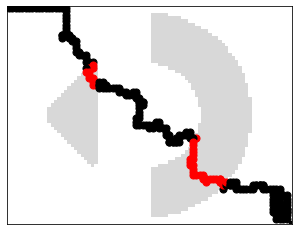

In [333]:
ani = create_animation(grid0, len(path), grids, plot_grid, first_elements)

In [334]:
ani





In [335]:
from IPython.display import HTML


# Define a function to display the animation in HTML
def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_jshtml())

# Display the animation
display_animation(ani)